## IBM Data Science Professional - Capstone Assignment

Use Foursquare API

In [1]:
# clear out the environment - uncomment as required.
%reset -f

Import the necessary libraries

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Mabplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  23.11 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  34.50 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  34.42 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  36.30 MB/s
vincent-0.4.4- 100% |###################

Include Foursquare credentials

In [3]:
# @hidden_cell
CLIENT_ID = 'JSZBZ4DAH1CVT25Z4AULBCGBT5PRPVF4NT1OGDNOLZ4UCB0T' # your Foursquare ID
CLIENT_SECRET = '0ZORYO4V0AQJPT0P0GUWLRK1EEGAWGFHZIHCBBQY0NJVTWJN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JSZBZ4DAH1CVT25Z4AULBCGBT5PRPVF4NT1OGDNOLZ4UCB0T
CLIENT_SECRET:0ZORYO4V0AQJPT0P0GUWLRK1EEGAWGFHZIHCBBQY0NJVTWJN


Run a test converting address to Latitude / Longitude

# Heliports in the City of Los Angeles

In [4]:
# From data.gov / transportation.gov, download the Airport database

# http://osav-usdot.opendata.arcgis.com/datasets/a36a509eab4e43b4864fb594a35b90d6_0

# Read into a Pandas DataFrame

# Extract out Los Angeles, California Heliports

In [5]:
# @hidden_cell
# This code generated by IBM Watson after manually adding Airports.csv and clicking 'Insert to code'
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_b94a22d139504c638522dfb46e8a98c4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_i7YxGvAykZFF5S7SZlQ367x38GQp8gcwYxxKQP4q4dP',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b94a22d139504c638522dfb46e8a98c4.get_object(Bucket='courseraweek6-donotdelete-pr-4zoqhjrgbefx9g',Key='Airports.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

airport_csv = pd.read_csv(body)
airport_csv.head()



/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,SiteNumber,FacilityType,LocationID,EffectiveDate,RegionCode,DistrictCode,StateAbbv,...,FSSTollFreePhoneBriefings,AltFSSID,AltFSSName,AltFSSTollFreePhoneBriefings,Enplanements,Passengers,Arrivals,Departures,FreightLbs,MailLbs
0,-85.911348,32.534024,1001,00530.1*H,Heliport,AL83,2015-03-05T00:00:00.000Z,ASO,JAN,AL,...,1-800-WX-BRIEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-88.098888,30.526583,1002,00536.*H,Heliport,5AL2,2015-03-05T00:00:00.000Z,ASO,JAN,AL,...,1-800-WX-BRIEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-88.198167,30.499306,1003,00536.02*A,Airport,2AL6,2015-03-05T00:00:00.000Z,ASO,JAN,AL,...,1-800-WX-BRIEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-87.737504,31.930708,1004,00539.*H,Heliport,AL48,2015-03-05T00:00:00.000Z,ASO,JAN,AL,...,1-800-WX-BRIEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-87.520000,32.285000,1005,00539.01*A,Airport,3AL7,2015-03-05T00:00:00.000Z,ASO,JAN,AL,...,1-800-WX-BRIEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# increase the dataframe defaults to see more columns
# pd.set_option('display.height', 1000)
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)


# find airports and heliports in the City of Los Angeles, California
df_LA = airport_csv[airport_csv['City'] == "Los Angeles"]
df_LA = df_LA.set_index('OBJECTID')
df_LA.rename (columns={'Y':'Latitude', 'X':'Longitude'}, inplace=True)
print (df_LA.loc[:,['FullName', 'City', 'Latitude', 'Longitude', 'Elevation']])


                                           FullName         City   Latitude   Longitude  Elevation
OBJECTID                                                                                          
2063        St Vincent Professional Office Building  Los Angeles  34.063900 -118.272575      464.0
2064                        Usc University Hospital  Los Angeles  34.053901 -118.201739      476.0
2065                          Van Nuys County Court  Los Angeles  34.183338 -118.447582      850.0
2066                                  Wilshire Area  Los Angeles  34.046955 -118.342577      150.0
2067                                Devonshire Area  Los Angeles  34.256947 -118.531475     1012.0
2068                                  Parker Center  Los Angeles  34.052234 -118.241185      450.0
2069                    Hotel New Otani Los Angeles  Los Angeles  34.051123 -118.242574      490.0
2070                            The Wilshire Thayer  Los Angeles  34.062509 -118.432579      470.0
2071      

In [7]:
# Show the Heliports on a map of Los Angeles, CA
latitude = 34.0522
longitude = -118.2437
map_LA = folium.Map (location=[latitude, longitude], zoom_start=11)

for lat, lng, airport_heliport, elevation in zip (df_LA['Latitude'], df_LA['Longitude'], df_LA['FullName'], df_LA['Elevation']):
    label = '{} - elevation:{}'.format(airport_heliport, elevation)
    label = folium.Popup (label, parse_html=True)
    folium.CircleMarker(
       [lat, lng],
       radius=5,
       popup=label,
       color='blue',
       fill=True,
       fill_color='#3186cc',
       fill_opacity=0.7,
       parse_html=False).add_to(map_LA)

# display map
map_LA

### Use Foursquare API 'venues/explore' to get information on the area immediately surrounding each heliport

In [8]:
# function that extracts the category of the venue : from previous lab
def get_category_type (row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    
    if len (categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
# @hidden_cell
def getNearbyVenues (names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip (names, latitudes, longitudes):
        # print (name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            lat,
            lng,
            VERSION,
            radius,
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # if there are results
        if results:
            print ('found items for {}'.format(name))
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name,
                lat,
                lng,
                v['venue']['name'],
                v['venue']['location']['lat'],
                v['venue']['location']['lng'],
                v['venue']['categories'][0]['name']) for v in results])
        
            nearby_venues = pd.DataFrame ([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['FullName',
                                'FullName Latitude',
                                'FullName Longitude',
                                'Venue',
                                'Venue Latitude',
                                'Venue Longitude',
                                'Venue Category']
        else:
            print ('no items found for {}'.format(name))
            
    return (nearby_venues)


In [10]:
# store values for Neighborhood, Latitude and Longitude 
airport_heliport_venues = getNearbyVenues (names=df_LA['FullName'],
                                 latitudes=df_LA['Latitude'],
                                 longitudes=df_LA['Longitude'])

found items for St Vincent Professional Office Building
found items for Usc University Hospital
found items for Van Nuys County Court
found items for Wilshire Area
found items for Devonshire Area
found items for Parker Center
found items for Hotel New Otani Los Angeles
found items for The Wilshire Thayer
found items for California Mart
found items for L A Co Mens Sheriffs Cntr Jail
found items for Lapd Hooper
found items for United Ca Bank Data Processing Ops
found items for The Westin Bonaventure Hotel
found items for City National Plaza
found items for Jay Stephen Hooper Memorial
found items for Terminal Annex
found items for City National Bank
found items for Sunset-Glendale
found items for Operating Engineers Pension Trust Bldg
found items for Bank Of America Data Center
found items for Beverly Center
found items for Everest & Jennings Helistop Nr 1
found items for Occidental Petroleum
found items for Van Nuys
found items for Engine Co Nr 108
found items for Biltmore Hotel
found it

In [11]:
airport_heliport_venues.groupby('FullName').count()


,FullName Latitude,FullName Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
FullName,,,,,,
A T & T Center,18,18,18,18,18,18
Abc-Tv,19,19,19,19,19,19
Bank Of America Data Center,10,10,10,10,10,10
Beverly Center,30,30,30,30,30,30
Biltmore Hotel,30,30,30,30,30,30
California Mart,30,30,30,30,30,30
Caltrans District 7,30,30,30,30,30,30
Cedars-Sinai Medical Center,30,30,30,30,30,30
Century City,30,30,30,30,30,30


In [12]:
print ('There are {} unique categories.'.format (len(airport_heliport_venues['Venue Category'].unique())))


There are 223 unique categories.


### 3. Analyze Each Neighborhood

In [26]:
# one hot encoding
LA_onehot = pd.get_dummies (airport_heliport_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['FullName'] = airport_heliport_venues['FullName']

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,FullName,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,Comedy Club,...,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Taxi Stand,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train Station,Travel Lounge,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant
0,St Vincent Professional Office Building,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,St Vincent Professional Office Building,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St Vincent Professional Office Building,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,St Vincent Professional Office Building,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,St Vincent Professional Office Building,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# to review the one_hot_encoding
LA_grouped = LA_onehot.groupby('FullName').mean().reset_index()
LA_grouped

,FullName,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,Comedy Club,...,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Taxi Stand,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train Station,Travel Lounge,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant
0,A T & T Center,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.055556,0.055556,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.0,0.000000,0.000000,0.000000,0.000000
1,Abc-Tv,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.052632,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.0,0.000000,0.000000,0.052632,0.000000
2,Bank Of America Data Center,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,Beverly Center,0.

In [29]:
num_top_venues = 5

for hood in LA_grouped['FullName']:
    print ("----"+hood+"----")
    temp = LA_grouped[LA_grouped['FullName'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print (temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print ('\n')

----A T & T Center----
          venue  freq
0   Art Gallery  0.22
1   Event Space  0.06
2           Gym  0.06
3   Coffee Shop  0.06
4  Cocktail Bar  0.06


----Abc-Tv----
                           venue  freq
0                       Dive Bar  0.11
1                Thai Restaurant  0.11
2  Vegetarian / Vegan Restaurant  0.11
3       Mediterranean Restaurant  0.05
4                     Restaurant  0.05


----Bank Of America Data Center----
                  venue  freq
0  Gym / Fitness Center   0.1
1         Historic Site   0.1
2           Coffee Shop   0.1
3  Fast Food Restaurant   0.1
4             Nightclub   0.1


----Beverly Center----
                     venue  freq
0           Clothing Store  0.07
1           Lingerie Store  0.07
2     Gym / Fitness Center  0.07
3  New American Restaurant  0.07
4         Department Store  0.03


----Biltmore Hotel----
                     venue  freq
0        French Restaurant  0.13
1              Salad Place  0.07
2  New American Restaurant  0

In [30]:
# workspace for temp work
# del neighborhoods_venues_sorted

In [31]:
def return_most_common_venues (row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['FullName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append ('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame (columns=columns)
neighborhoods_venues_sorted['FullName'] = LA_grouped['FullName']

for ind in np.arange(LA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted.head(5)

,FullName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A T & T Center,Art Gallery,Coffee Shop,Event Space,Cocktail Bar,Music Venue,Japanese Restaurant,Café,Gym,Gym / Fitness Center,Construction & Landscaping
1,Abc-Tv,Vegetarian / Vegan Restaurant,Thai Restaurant,Dive Bar,Breakfast Spot,Café,Sandwich Place,Chinese Restaurant,Juice Bar,Restaurant,Italian Restaurant
2,Bank Of America Data Center,Skate Park,Japanese Restaurant,Hotel,Historic Site,Pharmacy,Clothing Store,Fast Food Restaurant,Nightclub,Gym / Fitness Center,Coffee Shop
3,Beverly Center,New American Restaurant,Gym / Fitness Center,Lingerie Store,Clothing Store,Dance Studio,Shoe Store,Mexican Restaurant,Southern / Soul Food Restaurant,Department Store,Breakfast Spot
4,Biltmore Hotel,French Restaurant,Gym,New American Restaurant,Salad Place,Hotel Bar,Seafood Restaurant,Japanese Restaurant,Jewelry Store,Speakeasy,Southern / Soul Food Restaurant


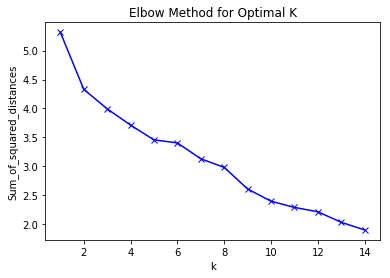

In [32]:
# Will first determine the optimal value of 'k' by using the 'elbow method'
LA_grouped_clustering = LA_grouped.drop ('FullName', 1)
import matplotlib.pyplot as plt
%matplotlib inline

Sum_of_squared_distances = []
K = range (1,15)
for k in K:
    km = KMeans (n_clusters=k)
    km = km.fit (LA_grouped_clustering)
    Sum_of_squared_distances.append (km.inertia_)

plt.plot (K, Sum_of_squared_distances, 'bx-')
plt.xlabel ('k')
plt.ylabel ('Sum_of_squared_distances')
plt.title ('Elbow Method for Optimal K')
plt.show()

In [33]:

# set number of clusters - based on the results of the 'elbow method' above
kclusters = 5

# run k-means clustering
kmeans = KMeans (n_clusters=kclusters, random_state=0).fit (LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
# kmeans.labels_[0:10]
print (kmeans.labels_)

[0 0 3 3 3 0 0 3 3 0 0 0 3 3 0 1 0 0 4 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 3 0 3
 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0]


In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert (0, 'Cluster Labels', kmeans.labels_)

print (neighborhoods_venues_sorted.head(10))
LA_merged = df_LA

# 
# 'Cluster Labels' will show as 'float' because of 'NaN' in tn_geo combined with doing a default 'how' merge of left'
# changed 'how' 'inner' and that keeps out the 'NaN'
# 5, 52 and 95 don't have venues. That makes 'Cluster Labels' 'NaN' and the turns it into 'float' values
# how to determine if no info was received from Foursquare API call (i.e. for 5, 52 and 95)?

# original LA_merged = LA_merged.join(neighborhoods_venues_sorted.set_index('FullName'), on='FullName', how='inner')
# use 'right' because not all venues return information from Foursquare into the neighborhoods_venues_sorted DF. This keeps them out of cluster map
LA_merged = LA_merged.join(neighborhoods_venues_sorted.set_index('FullName'), on='FullName', how='right')
# the above gives shape (100,16)

# toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood', how='left')
# the above gives shape (103,16)

LA_merged.shape

   Cluster Labels                     FullName          1st Most Common Venue  \
0               0               A T & T Center                    Art Gallery   
1               0                       Abc-Tv  Vegetarian / Vegan Restaurant   
2               3  Bank Of America Data Center                     Skate Park   
3               3               Beverly Center        New American Restaurant   
4               3               Biltmore Hotel              French Restaurant   
5               0              California Mart                    Coffee Shop   
6               0          Caltrans District 7               Sushi Restaurant   
7               3  Cedars-Sinai Medical Center            American Restaurant   
8               3                 Century City             Italian Restaurant   
9               0                  Chase Plaza                    Coffee Shop   

  2nd Most Common Venue    3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
0      

(57, 111)

In [35]:
# create map showing Boroughs with 'Toronto' in the name, with a different color for each cluster
map_clusters = folium.Map (location=[latitude, longitude], zoom_start=10)

# set the color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range (kclusters)]
colors_array = cm.rainbow (np.linspace (0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip (LA_merged['Latitude'], LA_merged['Longitude'], LA_merged['FullName'], LA_merged['Cluster Labels']):
    label = folium.Popup (str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat, lon],
    radius=3,
    popup=label,
    color=rainbow[cluster-1],
    fill=True,
    fill_color=rainbow[cluster-1],
    fill_opacity=0.7).add_to(map_clusters)

map_clusters



In [37]:
# Cluster 0 seems focused on bars and restaurants (looking at 1st and 2nd Most Common venues)
LA_merged.loc[LA_merged['Cluster Labels'] == 0, LA_merged.columns[[13] + list(range(100, LA_merged.shape[1]))]]

,FullName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
OBJECTID,,,,,,,,,,,,
2064,Usc University Hospital,0,Mexican Restaurant,Trail,Coffee Shop,Train Station,Electronics Store,Food,Flower Shop,Flea Market,Fish & Chips Shop,Filipino Restaurant
2065,Van Nuys County Court,0,Convenience Store,Chinese Restaurant,ATM,Rental Car Location,Filipino Restaurant,South American Restaurant,Shoe Store,Food,Shipping Store,Mexican Restaurant
2066,Wilshire Area,0,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Coffee Shop,Donut Shop,Shipping Store,Southern / Soul Food Restaurant,Café,Sandwich Place,Supermarket
2067,Devonshire Area,0,Fish & Chips Shop,Park,Fast Food Restaurant,Thrift / Vintage Store,Gas Station,Chinese Restaurant,Donut Shop,Frozen Yogurt Shop,Korean Restaurant,Sushi Restaurant
2068,Parker Center,0,Sushi Restaurant,Noodle House,Japanese Restaurant,Yoshoku Restaurant,Museum,Boutique,Bookstore,Supermarket,Jazz Club,Japanese Curry Restaurant
2069,Hotel New Otani Los Angeles,0,Sushi Restaurant,Noodle House,Coffee Shop,Art Gallery,Japanese Restaurant,Yoshoku Restaurant,Bakery,Candy Store,Breakfast Spot,Speakeasy
2070,The Wilshire Thayer,0,Department Store,Wine Shop,Residential Building (Apartment / Condo),Intersection,Yoshoku Restaurant,Empanada Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop
2071,California Mart,0,Coffee Shop,Theater,Hotel,Liquor Store,Leather Goods Store,Beer Bar,Juice Bar,Roof Deck,Brazilian Restaurant,Clothing Store
2072,L A Co Mens Sheriffs Cntr Jail,0,Train Station,Platform,Winery,Wine Bar,Yoshoku Restaurant,Farmers Market,Empanada Restaurant,Event Space,Fabric Shop,Falafel Restaurant


In [39]:
# Cluster 1 seems focused on transportation (looking at 1st Most Common Venue)
LA_merged.loc[LA_merged['Cluster Labels'] == 1, LA_merged.columns[[13] + list(range(100, LA_merged.shape[1]))]]

,FullName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
OBJECTID,,,,,,,,,,,,
2110,Dept Of Water And Power Granada Hills,1,Intersection,Yoshoku Restaurant,Empanada Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant


In [40]:
# Cluster 2 seems focused on recreation (looking at 1st and 2nd Most Common Venue)
LA_merged.loc[LA_merged['Cluster Labels'] == 2, LA_merged.columns[[13] + list(range(100, LA_merged.shape[1]))]]

,FullName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
OBJECTID,,,,,,,,,,,,
2100,Hughes/Corporate,2,Playground,Trail,Coffee Shop,Yoshoku Restaurant,Electronics Store,Food,Flower Shop,Flea Market,Fish & Chips Shop,Filipino Restaurant


In [41]:
# Cluster 3 seems like quite a mix
LA_merged.loc[LA_merged['Cluster Labels'] == 3, LA_merged.columns[[13] + list(range(100, LA_merged.shape[1]))]]

,FullName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
OBJECTID,,,,,,,,,,,,
2063,St Vincent Professional Office Building,3,Clothing Store,Sandwich Place,Music Venue,Bed & Breakfast,Bagel Shop,Donut Shop,Arts & Crafts Store,Fast Food Restaurant,Supermarket,Discount Store
2075,The Westin Bonaventure Hotel,3,Hotel,Café,Gastropub,Sandwich Place,Scenic Lookout,Roof Deck,Salad Place,Korean Restaurant,Sushi Restaurant,Steakhouse
2076,City National Plaza,3,Hotel,Lounge,Coffee Shop,Sandwich Place,Burger Joint,Fast Food Restaurant,Café,Seafood Restaurant,Mexican Restaurant,Scenic Lookout
2079,City National Bank,3,French Restaurant,Hotel,Seafood Restaurant,Jewelry Store,Sushi Restaurant,Speakeasy,Brewery,Library,Filipino Restaurant,Hotel Bar
2082,Bank Of America Data Center,3,Skate Park,Japanese Restaurant,Hotel,Historic Site,Pharmacy,Clothing Store,Fast Food Restaurant,Nightclub,Gym / Fitness Center,Coffee Shop
2083,Beverly Center,3,New American Restaurant,Gym / Fitness Center,Lingerie Store,Clothing Store,Dance Studio,Shoe Store,Mexican Restaurant,Southern / Soul Food Restaurant,Department Store,Breakfast Spot
2085,Occidental Petroleum,3,New American Restaurant,Coffee Shop,Yoga Studio,Vegetarian / Vegan Restaurant,Poke Place,Juice Bar,Tanning Salon,Movie Theater,Museum,Italian Restaurant
2089,Biltmore Hotel,3,French Restaurant,Gym,New American Restaurant,Salad Place,Hotel Bar,Seafood Restaurant,Japanese Restaurant,Jewelry Store,Speakeasy,Southern / Soul Food Restaurant
2098,International Tower,3,Hotel,Sandwich Place,Mexican Restaurant,Hotel Bar,Cupcake Shop,Steakhouse,Shopping Mall,Salad Place,Rock Club,Cocktail Bar


In [42]:
# Cluster 4 seems focused on Racetrack (looking at 1st Most Common Venue)
LA_merged.loc[LA_merged['Cluster Labels'] == 4, LA_merged.columns[[13] + list(range(100, LA_merged.shape[1]))]]

,FullName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
OBJECTID,,,,,,,,,,,,
2087,Engine Co Nr 108,4,Racetrack,Health & Beauty Service,Park,Theater,Yoshoku Restaurant,Electronics Store,Flower Shop,Flea Market,Fish & Chips Shop,Filipino Restaurant


In [ ]:
# This is the end of the notebook